# DataFrames in Pandas

In [3]:
# Two-dimensional array, Hetrogeneous data, Size mutable, Values of data Mutable
# # pandas.DataFrame( data, index, columns, dtype, copy)
import pandas as pd
import numpy as np
# Using List
Companies = ["Microsoft", "TCS", "Facebook", "Google"]
df = pd.DataFrame(Companies, columns=["Company"])
print(df)

#Using Dictionary

Company = { "Company": ["Microsoft", "TCS", "Facebook", "Google"], "Founder": ["Bill Gates", "Tata Sons", "Mark Zuckerberg", "Larry Page"]}
Company_Founders = pd.DataFrame(Company) #By default it will take keys as column name
print(Company_Founders)

# We can also use list of dictionary ,ndarrays, Dictionary of series to make dataframes

     Company
0  Microsoft
1        TCS
2   Facebook
3     Google
     Company          Founder
0  Microsoft       Bill Gates
1        TCS        Tata Sons
2   Facebook  Mark Zuckerberg
3     Google       Larry Page


In [38]:
print(Company_Founders["Company"]) #Iteration of Column
print(Company_Founders["Company"][2])
row = next(Company_Founders.iterrows())[1] #Iteration of Row
print("Using iterrows:\n",row)
print("Using itertuples:\n",next(Company_Founders.itertuples(1)))
print("Using loc method:\n",Company_Founders.loc[2])

0    Microsoft
1          TCS
2     Facebook
3       Google
Name: Company, dtype: object
Facebook
Using iterrows:
 Company     Microsoft
Founder    Bill Gates
Name: 0, dtype: object
Using itertuples:
 Pandas(Index=0, Company='Microsoft', Founder='Bill Gates')
Using loc method:
 Company           Facebook
Founder    Mark Zuckerberg
Name: 2, dtype: object


In [41]:
Ages = { "Name": ["Rachel", "Ross", "Tokyo", "Rio", "Otis"], "Ages": [30, 32, 29, 27, 23]}
Age = pd.DataFrame(Ages)
print(Age["Ages"].max()) 
print(Age.describe()) # Basic statistics of the numerical data in dataframe

32
            Ages
count   5.000000
mean   28.200000
std     3.420526
min    23.000000
25%    27.000000
50%    29.000000
75%    30.000000
max    32.000000


In [43]:
df3 = Company_Founders.append(Age) # Appending two dataframes
print(df3)
df4 = df3.drop(0) # Deletion of rows using labels(index)
print(df4)

     Company          Founder    Name  Ages
0  Microsoft       Bill Gates     NaN   NaN
1        TCS        Tata Sons     NaN   NaN
2   Facebook  Mark Zuckerberg     NaN   NaN
3     Google       Larry Page     NaN   NaN
0        NaN              NaN  Rachel  30.0
1        NaN              NaN    Ross  32.0
2        NaN              NaN   Tokyo  29.0
3        NaN              NaN     Rio  27.0
4        NaN              NaN    Otis  23.0
    Company          Founder   Name  Ages
1       TCS        Tata Sons    NaN   NaN
2  Facebook  Mark Zuckerberg    NaN   NaN
3    Google       Larry Page    NaN   NaN
1       NaN              NaN   Ross  32.0
2       NaN              NaN  Tokyo  29.0
3       NaN              NaN    Rio  27.0
4       NaN              NaN   Otis  23.0


# DataFrame Basic Functionality

In [21]:
numbers = pd.DataFrame({'A' :np.random.rand(5),
                       'B' : np.random.rand(5)})
print(numbers)

print("Tanspose:\n", numbers.T)
print("axes:", numbers.axes)  #Returns the list of the labels of the series.
print("Checking for empty df:", numbers.empty)
print("The dimensions of the object:", numbers.ndim)
print ("The first two rows of the data series:\n", numbers.head(2))  #Similarly for tail() if you want to start from below

          A         B
0  0.456702  0.631895
1  0.052284  0.214219
2  0.540046  0.752541
3  0.697478  0.209131
4  0.972084  0.448633
Tanspose:
           0         1         2         3         4
A  0.456702  0.052284  0.540046  0.697478  0.972084
B  0.631895  0.214219  0.752541  0.209131  0.448633
axes: [RangeIndex(start=0, stop=5, step=1), Index(['A', 'B'], dtype='object')]
Checking for empty df: False
The dimensions of the object: 2
The first two rows of the data series:
           A         B
0  0.456702  0.631895
1  0.052284  0.214219


# Workin With Text Data

In [31]:
names = pd.Series(["Rachel", "Ross", "Tokyo", "Rio", "Otis"])
print(names) 
print("Lower Case\n",names.str.lower())  #Same for uppercase
print("Length of each element\n",names.str.len())

0    Rachel
1      Ross
2     Tokyo
3       Rio
4      Otis
dtype: object
Lower Case
 0    rachel
1      ross
2     tokyo
3       rio
4      otis
dtype: object
Length of each element
 0    6
1    4
2    5
3    3
4    4
dtype: int64


# Options And Customization

In [41]:
print(pd.get_option("display.max_rows"))  # By default max rows value limit is 80 and for column it is 20
print(pd.get_option("display.max_columns"))
pd.set_option("display.max_rows",80) # we can change the default number of rows to be displayed
print(pd.get_option("display.max_rows"))
pd.reset_option("display.max_rows") # we can change the value back to the default number of rows to be displayed
print(pd.get_option("display.max_rows"))
pd.describe_option("display.max_rows") # describe_option prints the description of the argument.

60
20
80
60
display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]


# Indexing and Selecting data

In [46]:
# get the subset of pandas object
data = pd.DataFrame(np.random.randn(8, 4),index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
print(data.loc[:,'A'])  #select all rows for a specific column
print(data.loc[:,['A','C']])  # Select all rows for multiple columns
print(data.loc[['a','b','f','h'],['A','C']])  # Select few rows for multiple columns
print(data.loc['a':'d'])   # Select range of rows for all columns

#iloc()   to get purely integer based indexing
#ix()    Besides pure label based and integer based, Pandas provides a hybrid method

a   -1.349023
b    1.363906
c   -1.129635
d   -0.410142
e    1.606984
f    0.132780
g    1.073345
h   -1.350227
Name: A, dtype: float64
          A         C
a -1.349023  0.175006
b  1.363906  0.577518
c -1.129635 -1.415720
d -0.410142 -2.413055
e  1.606984  1.886498
f  0.132780 -0.873341
g  1.073345 -0.274465
h -1.350227 -0.754654
          A         C
a -1.349023  0.175006
b  1.363906  0.577518
f  0.132780 -0.873341
h -1.350227 -0.754654
          A         B         C         D
a -1.349023  0.336770  0.175006 -1.043561
b  1.363906 -0.718010  0.577518 -0.055791
c -1.129635  0.808781 -1.415720  0.961798
d -0.410142  1.369082 -2.413055  0.217524


# Grouping data

In [51]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
ipl = pd.DataFrame(ipl_data)

print(ipl.groupby('Team'))   # Splitting Data into groups
print(ipl.groupby('Team').groups)  #Viewing groups
print(ipl.groupby(['Team','Year']).groups)  #Group by with multiple columns

# Iterating through groups
grouped = ipl.groupby('Year')

for name,group in grouped:
    print(name)
    print(group)

print("2014\n",grouped.get_group(2014))  # we can select a single group.

{'Devils': Int64Index([2, 3], dtype='int64'), 'Kings': Int64Index([4, 6, 7], dtype='int64'), 'Riders': Int64Index([0, 1, 8, 11], dtype='int64'), 'Royals': Int64Index([9, 10], dtype='int64'), 'kings': Int64Index([5], dtype='int64')}
{('Devils', 2014): Int64Index([2], dtype='int64'), ('Devils', 2015): Int64Index([3], dtype='int64'), ('Kings', 2014): Int64Index([4], dtype='int64'), ('Kings', 2016): Int64Index([6], dtype='int64'), ('Kings', 2017): Int64Index([7], dtype='int64'), ('Riders', 2014): Int64Index([0], dtype='int64'), ('Riders', 2015): Int64Index([1], dtype='int64'), ('Riders', 2016): Int64Index([8], dtype='int64'), ('Riders', 2017): Int64Index([11], dtype='int64'), ('Royals', 2014): Int64Index([9], dtype='int64'), ('Royals', 2015): Int64Index([10], dtype='int64'), ('kings', 2015): Int64Index([5], dtype='int64')}
2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Tea

# Merging and Joining

In [54]:
left = pd.DataFrame({
   'id':[1,2,3,4,5],
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({
	'id':[1,2,3,4,5],
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(pd.merge(left,right,on='id'))  #Merge Two DataFrames on a Key
print(pd.merge(left,right,on=['id','subject_id']))    #Merge Two DataFrames on Multiple Keys
print(pd.merge(left, right, on='subject_id', how='left'))    #for left join
# Similarily for outer join ,inner join there how is equal to outer and inner

   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty
   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty


# Concatenation

In [60]:
one = pd.DataFrame({
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'Marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

two = pd.DataFrame({
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'Marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])
print(pd.concat([one,two]))   # We also do the same by using one.append(two), append object can take multiple arguments one.append([two,one,two])
print(pd.concat([one,two],keys=['x','y'], ignore_index=True))   # to associate specific keys with each of the pieces
#  resultant object has to follow its own indexing
print(pd.concat([one,two],axis=1))   # if axis=1, then the new columns will be appended

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
1   Billy       sub2            89
2   Brian       sub4            80
3    Bran       sub3            79
4   Bryce       sub6            97
5   Betty       sub5            88
     Name subject_id  Marks_scored
0    Alex       sub1            98
1     Amy       sub2            90
2   Allen       sub4            87
3   Alice       sub6            69
4  Ayoung       sub5            78
5   Billy       sub2            89
6   Brian       sub4            80
7    Bran       sub3            79
8   Bryce       sub6            97
9   Betty       sub5            88
     Name subject_id  Marks_scored   Name subject_id  Marks_scored
1    Alex       sub1            98  Billy       sub2            89
2     Amy       sub2            90  Brian       sub4            80
3   Allen       sub4         

# Date Functionality

In [63]:
print(pd.date_range('1/1/2021', periods=5))  
#Creating the date series by specifying the period,By default, the frequency of range is Days.
print(pd.date_range('1/1/2011', periods=5,freq='M'))  # changing the frequency

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='M')


# Time Delta

In [68]:
# differences in times, expressed in difference units, for example, days, hours, minutes, seconds

print(pd.Timedelta('2 days 2 hours 15 minutes 30 seconds'))
print(pd.Timedelta(6,unit='h'))   # units = hours
print(pd.Timedelta(days=2))

2 days 02:15:30
0 days 06:00:00
2 days 00:00:00


# Basic Plotting

          A         B
a  0.545780  0.205284
b  0.792695  0.359266
c  0.004894  0.965344
d  0.480436  0.333435
f  0.309366  0.272065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B3EA79D9D0>,
      dtype=object)

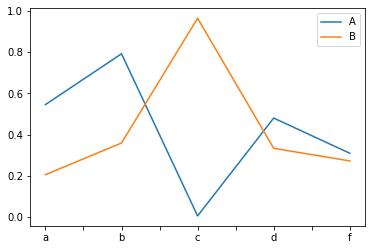

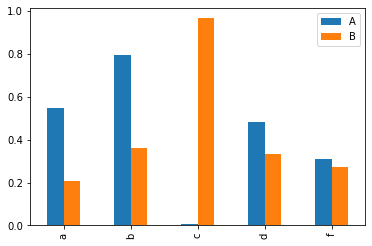

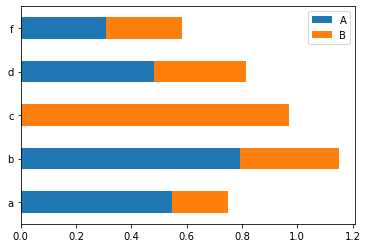

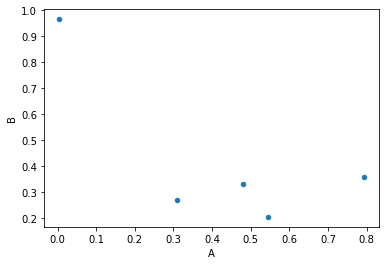

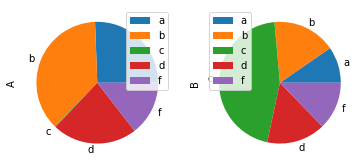

In [82]:
plotting = pd.DataFrame(np.random.rand(5,2),index=['a','b','c','d','f'], columns=list('AB'))
print(plotting)
plotting.plot()
plotting.plot.bar()  # Bars
plotting.plot.barh(stacked = True)
plotting.plot.scatter(x = 'A', y = 'B')  # Sactter plot
plotting.plot.pie(subplots=True)